In [85]:
%matplotlib notebook
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
family_data = '../data/2017/familyxx.csv'

In [4]:
family_data_df = pd.read_csv(family_data)

In [5]:
family_data_df.head()

,FINT_Y_P,FINT_M_P,FMX,RECTYPE,SRVY_YR,HHX,FM_SIZE,FM_STRCP,FM_TYPE,FM_STRP,...,COVCONF,FHICOST,FMEDBILL,FMEDBPAY,FMEDBNOP,FSAF,FHICOVCT,FHICOVYN,FPRCOOH,FHIEBCCT
0,2017,2,1,60,2017,3,1,11,1,11,...,NaN,1,2,2,NaN,2,1,1,2.0,0.0
1,2017,4,1,60,2017,8,2,31,3,31,...,NaN,0,2,2,NaN,2,2,1,NaN,NaN
2,2017,3,1,60,2017,9,1,11,1,11,...,4.0,1,2,2,NaN,2,1,1,NaN,1.0
3,2017,3,1,60,2017,11,4,44,4,44,...,4.0,9,2,2,NaN,1,4,1,2.0,4.0
4,2017,1,1,60,2017,15,1,11,1,11,...,2.0,2,2,2,NaN,2,1,1,2.0,1.0


In [42]:
family_outdata = family_data_df.loc[:,['RECTYPE','SRVY_YR','HHX','FMX', 'FM_SIZE', 'FM_TYPE', 'FSRUNOUT', 'FSLAST', 'WTFA_FAM']]
family_outdata.head()

,RECTYPE,SRVY_YR,HHX,FMX,FM_SIZE,FM_TYPE,FSRUNOUT,FSLAST,WTFA_FAM
0,60,2017,3,1,1,1,3,3,4000
1,60,2017,8,1,2,3,3,3,3778
2,60,2017,9,1,1,1,3,3,3143
3,60,2017,11,1,4,4,3,2,4070
4,60,2017,15,1,1,1,3,3,4960


In [45]:
family_outdata['HH with Food Concern due to Money']=0
family_outdata['HH with Children']=0

for index, row in family_outdata.iterrows():
    
    if family_outdata.loc[index, 'FSRUNOUT'] in (1,2):
        family_outdata.loc[index, 'HH with Food Concern due to Money'] = 1
    if family_outdata.loc[index, 'FSLAST'] in (1,2):
        family_outdata.loc[index, 'HH with Food Concern due to Money'] = 1
    if family_outdata.loc[index, 'FM_TYPE'] in (3,4):
        family_outdata.loc[index, 'HH with Children'] = 1


In [46]:
family_outdata['HH with Food Concern due to Money'].value_counts()

0    28499
1     4658
Name: HH with Food Concern due to Money, dtype: int64

In [47]:
family_outdata['HH with Children'].value_counts()

0    23554
1     9603
Name: HH with Children, dtype: int64

In [48]:
family_outdata.head()

,RECTYPE,SRVY_YR,HHX,FMX,FM_SIZE,FM_TYPE,FSRUNOUT,FSLAST,WTFA_FAM,HH with Food Concern due to Money,HH with Children
0,60,2017,3,1,1,1,3,3,4000,0,0
1,60,2017,8,1,2,3,3,3,3778,0,1
2,60,2017,9,1,1,1,3,3,3143,0,0
3,60,2017,11,1,4,4,3,2,4070,1,1
4,60,2017,15,1,1,1,3,3,4960,0,0


In [13]:
household_data = '../data/2017/househld.csv'

In [14]:
household_data_df = pd.read_csv(household_data)
household_data_df.head()

,INTV_QRT,INTV_MON,LIVQRT,ACPTCHLD,REJ_PER,REJ_FAM,ACPT_PER,ACPT_FAM,NON_INTV,RECTYPE,SRVY_YR,HHX,REGION,WTIA_HH,WTFA_HH,PSTRAT,PPSU
0,1,3,1,NaN,NaN,NaN,NaN,NaN,5.0,10,2017,2,2,2314.4,0,134,7
1,1,2,1,0.0,0.0,0.0,1.0,1.0,NaN,10,2017,3,3,2410.0,4177,126,3
2,1,1,1,NaN,NaN,NaN,NaN,NaN,2.0,10,2017,4,2,853.5,0,147,60
3,1,2,11,NaN,NaN,NaN,NaN,NaN,5.0,10,2017,6,3,2028.1,0,104,27
4,1,3,1,NaN,NaN,NaN,NaN,NaN,1.0,10,2017,7,4,1160.6,0,114,43


In [15]:
child_data = '../data/2017/samchild.csv'

In [19]:
child_data_df = pd.read_csv(child_data)
child_data_df.head()

,FPX,INTV_QRT,SEX,FMX,HISPAN_I,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,RECTYPE,...,CMBOU_PR,CYTQU_YG,CYTQ_BTY,CYTQ_MDY,CYTQU_TA,CYTQ_BTT,CYTQ_MDT,CYTQU_QG,CYTQ_BTQ,CYTQ_MDQ
0,2,1,1,1,12,2,2,2,10,40,...,8.0,8.0,NaN,NaN,8.0,NaN,NaN,8.0,NaN,NaN
1,4,1,1,1,12,1,1,1,13,40,...,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN
2,4,1,2,1,0,1,1,1,13,40,...,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN
3,3,1,1,1,12,9,4,12,5,40,...,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN
4,3,1,2,1,12,1,1,1,11,40,...,2.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN


In [17]:
# Look at values of SMKSTAT2 
child_data_df['CASSTILL'].value_counts()

1.0    739
2.0    420
9.0      9
Name: CASSTILL, dtype: int64

In [21]:
child_outdata = child_data_df.loc[:,['RECTYPE','SRVY_YR','HHX','FMX','FPX','REGION','WTFA_SC','CASHMEV','CASSTILL', 'ADD2N', 'AUTISMN', 'RSCL6']]

child_outdata['HH with Asthmatic Child']=0
child_outdata['HH with ADHD/ADD Child']=0
child_outdata['HH with Autistic Child']=0
child_outdata['HH with Child With Concentration/Emotional/Behavior Issues']=0
for index, row in child_outdata.iterrows():
    
    if child_outdata.loc[index,'CASHMEV'] == 1:
        child_outdata.loc[index,'HH with Asthmatic Child'] = 1
    if child_outdata.loc[index, 'ADD2N'] == 1:
        child_outdata.loc[index, 'HH with ADHD/ADD Child'] = 1
    if child_outdata.loc[index, 'AUTISMN'] == 1:
        child_outdata.loc[index, 'HH with Autistic Child'] = 1
    if child_outdata.loc[index, 'RSCL6'] == (1):
        child_outdata.loc[index, 'HH with Child With Concentration/Emotional/Behavior Issues'] = 1
    elif child_outdata.loc[index, 'RSCL6'] == (2):
        child_outdata.loc[index, 'HH with Child With Concentration/Emotional/Behavior Issues'] = 1
    elif child_outdata.loc[index, 'RSCL6'] == (3):
        child_outdata.loc[index, 'HH with Child With Concentration/Emotional/Behavior Issues'] = 1
                
        
        
child_outdata['HH with Asthmatic Child'].value_counts()

0    7677
1    1168
Name: HH with Asthmatic Child, dtype: int64

In [22]:
child_outdata['HH with ADHD/ADD Child'].value_counts()

0    8212
1     633
Name: HH with ADHD/ADD Child, dtype: int64

In [23]:
child_outdata['HH with Autistic Child'].value_counts()

0    8664
1     181
Name: HH with Autistic Child, dtype: int64

In [24]:
child_outdata['HH with Child With Concentration/Emotional/Behavior Issues'].value_counts()

0    7293
1    1552
Name: HH with Child With Concentration/Emotional/Behavior Issues, dtype: int64

In [26]:
adult_data = '../data/2017/samadult.csv'

In [27]:
adult_data_df = pd.read_csv(adult_data)
adult_data_df.head()

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,MBO_PRO1,YTQU_YG1,YTQ_BTY1,YTQ_MDY1,YTQU_TA1,YTQ_BTT1,YTQ_MDT1,YTQU_QG1,YTQ_BTQ1,YTQ_MDQ1
0,1,1,3,1,5829.3,5044,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
1,1,1,9,1,2752.4,3770,1,12,7,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
2,2,1,11,1,14902.0,17305,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
3,1,1,15,1,8531.8,7383,2,12,5,1,...,2,1,1.0,1.0,1,1.0,2.0,2,NaN,NaN
4,1,1,18,1,5477.2,8314,1,0,1,1,...,2,1,1.0,1.0,2,NaN,NaN,2,NaN,NaN


In [28]:
# Look at values of SMKSTAT2 
adult_data_df['SMKSTAT2'].value_counts()



4    16015
3     6600
1     3080
2      935
9       99
5       13
Name: SMKSTAT2, dtype: int64

In [29]:
adult_outdata = adult_data_df.loc[:,['RECTYPE','SRVY_YR','HHX','FMX','FPX','REGION','WTFA_SA','COPDEV','AASMEV',
                                     'AASSTILL','SMKSTAT2']]

adult_outdata['HH with Smoker']=0

for index, row in adult_outdata.iterrows():
    
    if adult_outdata.loc[index,'SMKSTAT2'] in (1,2,5):
        adult_outdata.loc[index,'HH with Smoker'] = 1
    
    
adult_outdata['HH with Smoker'].value_counts()

0    22714
1     4028
Name: HH with Smoker, dtype: int64

In [194]:
family_merge.head()

,HHX,FMX,SRVY_YR,FM_SIZE,HH with Children,HH with Smoker,HH with Asthmatic Child,HH with Food Concern due to Money,HH with ADHD/ADD Child,HH with Autistic Child,HH with Child With Concentration/Emotional/Behavior Issues,WTFA_SA,WTFA_SC,WTFA_FAM
0,11,1,2017,Medium,1,1,0,1,0,0,0,17305,4027,4070
1,18,1,2017,Medium,1,1,0,0,0,0,0,8314,8633,2853
2,19,1,2017,Small,1,0,0,0,0,0,1,10888,3351,3454
3,26,1,2017,Small,1,0,1,0,0,0,0,5164,5435,4633
4,47,1,2017,Medium,1,0,0,0,0,0,0,28072,7735,3862


In [231]:
hh_with_smk = family_merge.loc[family_merge['HH with Smoker'] == 1]
hh_with_smk_small = hh_with_smk.loc[hh_with_smk['FM_SIZE'] == 'Small']
hh_with_smk_small_asthma = hh_with_smk_small.loc[hh_with_smk_small['HH with Asthmatic Child'] == 1]
hh_with_smk_small_asthma  = hh_with_smk_small_asthma['FM_SIZE'].count()
#hh_with_smk_small_asthma = hh_with_smk_small_asthma.mean()
hh_with_smk_small_asthma

90

In [209]:
hh_with_smk_medium = hh_with_smk.loc[hh_with_smk['FM_SIZE'] == 'Medium']
hh_with_smk_medium_asthma = hh_with_smk_medium.loc[hh_with_smk_medium['HH with Asthmatic Child'] == 1]
hh_with_smk_medium_asthma  = hh_with_smk_medium_asthma['FM_SIZE'].count()
hh_with_smk_medium_asthma

72

In [210]:
hh_with_smk_large = hh_with_smk.loc[hh_with_smk['FM_SIZE'] == 'Large']
hh_with_smk_large_asthma = hh_with_smk_large.loc[hh_with_smk_large['HH with Asthmatic Child'] == 1]
hh_with_smk_large_asthma  = hh_with_smk_large_asthma['FM_SIZE'].count()
hh_with_smk_large_asthma

15

In [211]:
hh_with_smk_xl = hh_with_smk.loc[hh_with_smk['FM_SIZE'] == 'XL']
hh_with_smk_xl_asthma = hh_with_smk_xl.loc[hh_with_smk_xl['HH with Asthmatic Child'] == 1]
hh_with_smk_xl_asthma = hh_with_smk_xl_asthma['FM_SIZE'].count()
hh_with_smk_xl_asthma

0

In [221]:
hh_without_smk = family_merge.loc[family_merge['HH with Smoker'] == 0]
hh_without_smk_small = hh_without_smk.loc[hh_without_smk['FM_SIZE'] == 'Small']
hh_without_smk_small_asthma = hh_without_smk_small.loc[hh_without_smk_small['HH with Asthmatic Child'] == 1]
hh_without_smk_small_asthma  = hh_without_smk_small_asthma['FM_SIZE'].count()
hh_without_smk_small_asthma

298

In [222]:
hh_without_smk_medium = hh_without_smk.loc[hh_without_smk['FM_SIZE'] == 'Medium']
hh_without_smk_medium_asthma = hh_without_smk_medium.loc[hh_without_smk_medium['HH with Asthmatic Child'] == 1]
hh_without_smk_medium_asthma  = hh_without_smk_medium_asthma['FM_SIZE'].count()
hh_without_smk_medium_asthma

368

In [223]:
hh_without_smk_large = hh_without_smk.loc[hh_without_smk['FM_SIZE'] == 'Large']
hh_without_smk_large_asthma = hh_without_smk_large.loc[hh_without_smk_large['HH with Asthmatic Child'] == 1]
hh_without_smk_large_asthma  = hh_without_smk_large_asthma['FM_SIZE'].count()
hh_without_smk_large_asthma

62

In [224]:
hh_without_smk_xl = hh_without_smk.loc[hh_without_smk['FM_SIZE'] == 'XL']
hh_without_smk_xl_asthma = hh_without_smk_xl.loc[hh_without_smk_xl['HH with Asthmatic Child'] == 1]
hh_without_smk_xl_asthma = hh_without_smk_xl_asthma['FM_SIZE'].count()
hh_without_smk_xl_asthma

9

In [32]:
adult_outdata.head()

,RECTYPE,SRVY_YR,HHX,FMX,FPX,REGION,WTFA_SA,COPDEV,AASMEV,AASSTILL,SMKSTAT2,HH with Smoker
0,30,2017,3,1,1,3,5044,2,2,NaN,1,1
1,30,2017,9,1,1,2,3770,2,2,NaN,4,0
2,30,2017,11,1,2,2,17305,2,1,1.0,2,1
3,30,2017,15,1,1,2,7383,2,2,NaN,3,0
4,30,2017,18,1,1,3,8314,2,1,2.0,2,1


In [33]:
child_outdata.head()

,RECTYPE,SRVY_YR,HHX,FMX,FPX,REGION,WTFA_SC,CASHMEV,CASSTILL,ADD2N,AUTISMN,RSCL6,HH with Asthmatic Child,HH with ADHD/ADD Child,HH with Autistic Child,HH with Child With Concentration/Emotional/Behavior Issues
0,40,2017,8,1,2,3,4808,1,2.0,NaN,NaN,8.0,1,0,0,0
1,40,2017,11,1,4,2,4027,2,NaN,NaN,NaN,0.0,0,0,0,0
2,40,2017,18,1,4,3,8633,2,NaN,NaN,NaN,0.0,0,0,0,0
3,40,2017,19,1,3,4,3351,2,NaN,NaN,NaN,1.0,0,0,0,1
4,40,2017,22,1,3,3,18769,2,NaN,NaN,NaN,0.0,0,0,0,0


In [51]:
merge_adult_child = pd.merge(adult_outdata, child_outdata, on=["HHX","FMX"])
merge_adult_child = merge_adult_child.loc[:,['HHX','FMX','HH with Smoker','HH with Asthmatic Child', 'HH with ADHD/ADD Child', 'HH with Autistic Child', 'HH with Child With Concentration/Emotional/Behavior Issues', 'WTFA_SA','WTFA_SC']]
merge_adult_child.head()

,HHX,FMX,HH with Smoker,HH with Asthmatic Child,HH with ADHD/ADD Child,HH with Autistic Child,HH with Child With Concentration/Emotional/Behavior Issues,WTFA_SA,WTFA_SC
0,11,1,1,0,0,0,0,17305,4027
1,18,1,1,0,0,0,0,8314,8633
2,19,1,0,0,0,0,1,10888,3351
3,26,1,0,1,0,0,0,5164,5435
4,47,1,0,0,0,0,0,28072,7735


In [52]:
family_merge = pd.merge(family_outdata, merge_adult_child, on=['HHX', 'FMX'])
family_merge = family_merge.loc[:,['HHX','FMX', 'SRVY_YR', 'FM_SIZE', 'HH with Children', 'HH with Smoker','HH with Asthmatic Child', 'HH with Food Concern due to Money', 'HH with ADHD/ADD Child', 'HH with Autistic Child', 'HH with Child With Concentration/Emotional/Behavior Issues', 'WTFA_SA','WTFA_SC', 'WTFA_FAM']]
family_merge.head()

,HHX,FMX,SRVY_YR,FM_SIZE,HH with Children,HH with Smoker,HH with Asthmatic Child,HH with Food Concern due to Money,HH with ADHD/ADD Child,HH with Autistic Child,HH with Child With Concentration/Emotional/Behavior Issues,WTFA_SA,WTFA_SC,WTFA_FAM
0,11,1,2017,4,1,1,0,1,0,0,0,17305,4027,4070
1,18,1,2017,5,1,1,0,0,0,0,0,8314,8633,2853
2,19,1,2017,3,1,0,0,0,0,0,1,10888,3351,3454
3,26,1,2017,2,1,0,1,0,0,0,0,5164,5435,4633
4,47,1,2017,5,1,0,0,0,0,0,0,28072,7735,3862


In [61]:
# Use the value counts to determine the number of students
smkcounts = merge_adult_child['HH with Smoker'].value_counts()

# Convert the value counts into a dataframe
hh_smk_asthma_counts = pd.DataFrame({'Smoker Flag':smkcounts.index, 'Count':smkcounts.values})

smk_asthma = merge_adult_child.groupby(['HH with Smoker'])
hh_smk_asthma_counts["Percent with Asthmatic Child"] = 100 * smk_asthma["HH with Asthmatic Child"].mean()
hh_smk_asthma_counts["Number with Asthmatic Child"] = smk_asthma["HH with Asthmatic Child"].sum()
hh_smk_asthma_counts

,Smoker Flag,Count,Percent with Asthmatic Child,Number with Asthmatic Child
0,0,5875,12.544681,737
1,1,1106,16.003617,177


In [62]:
hh_smk_adhd_counts = pd.DataFrame({'Smoker Flag':smkcounts.index, 'Count':smkcounts.values})

smk_adhd = merge_adult_child.groupby(['HH with Smoker'])
hh_smk_adhd_counts["Percent with ADHD/ADD Child"] = 100 * smk_asthma["HH with ADHD/ADD Child"].mean()
hh_smk_adhd_counts["Number with ADHD/ADD Child"] = smk_asthma["HH with ADHD/ADD Child"].sum()
hh_smk_adhd_counts

,Smoker Flag,Count,Percent with ADHD/ADD Child,Number with ADHD/ADD Child
0,0,5875,6.604255,388
1,1,1106,12.748644,141


In [63]:
hh_smk_autism_counts = pd.DataFrame({'Smoker Flag':smkcounts.index, 'Count':smkcounts.values})

smk_autism = merge_adult_child.groupby(['HH with Smoker'])
hh_smk_autism_counts["Percent with Autistic Child"] = 100 * smk_asthma["HH with Autistic Child"].mean()
hh_smk_autism_counts["Number with Autistic Child"] = smk_asthma["HH with Autistic Child"].sum()
hh_smk_autism_counts

,Smoker Flag,Count,Percent with Autistic Child,Number with Autistic Child
0,0,5875,1.991489,117
1,1,1106,3.526221,39


In [64]:
hh_smk_behavior_counts = pd.DataFrame({'Smoker Flag':smkcounts.index, 'Count':smkcounts.values})

smk_behavior = merge_adult_child.groupby(['HH with Smoker'])
hh_smk_behavior_counts["Percent with Child with Concentration/Emotional/Behavior Issues"] = 100 * smk_asthma["HH with Child With Concentration/Emotional/Behavior Issues"].mean()
hh_smk_behavior_counts["Number with  Child with Concentration/Emotional/Behavior Issues"] = smk_asthma["HH with Child With Concentration/Emotional/Behavior Issues"].sum()
hh_smk_behavior_counts

,Smoker Flag,Count,Percent with Child with Concentration/Emotional/Behavior Issues,Number with Child with Concentration/Emotional/Behavior Issues
0,0,5875,17.208511,1011
1,1,1106,26.039783,288


In [65]:
#food status comparison

In [72]:
foodcounts = family_merge['HH with Food Concern due to Money'].value_counts()

hh_food_asthma_counts = pd.DataFrame({'Food Concern Flag':foodcounts.index, 'Count':foodcounts.values})

food_asthma = family_merge.groupby(['HH with Food Concern due to Money'])
hh_food_asthma_counts["Percent with Asthmatic Child"] = 100 * food_asthma["HH with Asthmatic Child"].mean()
hh_food_asthma_counts["Number with Asthmatic Child"] = food_asthma["HH with Asthmatic Child"].sum()
hh_food_asthma_counts

,Food Concern Flag,Count,Percent with Asthmatic Child,Number with Asthmatic Child
0,0,5774,12.556287,725
1,1,1207,15.658658,189


In [73]:
hh_food_autism_counts = pd.DataFrame({'Food Concern Flag':foodcounts.index, 'Count':foodcounts.values})

food_autism = family_merge.groupby(['HH with Food Concern due to Money'])
hh_food_autism_counts["Percent with Autistic Child"] = 100 * food_asthma["HH with Autistic Child"].mean()
hh_food_autism_counts["Number with AutisticChild"] = food_asthma["HH with Autistic Child"].sum()
hh_food_autism_counts

,Food Concern Flag,Count,Percent with Autistic Child,Number with AutisticChild
0,0,5774,2.060963,119
1,1,1207,3.065452,37


In [74]:
hh_food_adhd_counts = pd.DataFrame({'Food Concern Flag':foodcounts.index, 'Count':foodcounts.values})

food_adhd = family_merge.groupby(['HH with Food Concern due to Money'])
hh_food_adhd_counts["Percent with ADHD/ADD Child"] = 100 * food_asthma["HH with ADHD/ADD Child"].mean()
hh_food_adhd_counts["Number with ADHD/ADD Child"] = food_asthma["HH with ADHD/ADD Child"].sum()
hh_food_adhd_counts

,Food Concern Flag,Count,Percent with ADHD/ADD Child,Number with ADHD/ADD Child
0,0,5774,6.702459,387
1,1,1207,11.764706,142


In [76]:
hh_food_behavior_counts = pd.DataFrame({'Food Concern Flag':foodcounts.index, 'Count':foodcounts.values})

food_behavior = family_merge.groupby(['HH with Food Concern due to Money'])
hh_food_behavior_counts["Percent with Child with Concentration/Emotional/Behavior Issues"] = 100 * food_asthma["HH with Child With Concentration/Emotional/Behavior Issues"].mean()
hh_food_behavior_counts["Number with Child with Concentration/Emotional/Behavior Issues"] = food_asthma["HH with Child With Concentration/Emotional/Behavior Issues"].sum()
hh_food_behavior_counts

,Food Concern Flag,Count,Percent with Child with Concentration/Emotional/Behavior Issues,Number with Child with Concentration/Emotional/Behavior Issues
0,0,5774,16.695532,964
1,1,1207,27.754764,335


In [78]:
family_merge['FM_SIZE'].max()

14

In [80]:
bins = [1, 3, 5, 7, 50]
group_names = ['Small', 'Medium', 'Large', 'XL']
family_merge['FM_SIZE'] = pd.cut(family_merge['FM_SIZE'], bins, labels = group_names)
family_merge.head()

,HHX,FMX,SRVY_YR,FM_SIZE,HH with Children,HH with Smoker,HH with Asthmatic Child,HH with Food Concern due to Money,HH with ADHD/ADD Child,HH with Autistic Child,HH with Child With Concentration/Emotional/Behavior Issues,WTFA_SA,WTFA_SC,WTFA_FAM
0,11,1,2017,Medium,1,1,0,1,0,0,0,17305,4027,4070
1,18,1,2017,Medium,1,1,0,0,0,0,0,8314,8633,2853
2,19,1,2017,Small,1,0,0,0,0,0,1,10888,3351,3454
3,26,1,2017,Small,1,0,1,0,0,0,0,5164,5435,4633
4,47,1,2017,Medium,1,0,0,0,0,0,0,28072,7735,3862


In [36]:
# Create lists of child-asthma flags associated with smoking and nonsmoking households
child_flags_for_smokers=[]
child_flags_for_nonsmokers=[]

for index, row in merge_adult_child.iterrows():
    
    if merge_adult_child.loc[index,'HH with Smoker'] == 1:
        child_flags_for_smokers.append(merge_adult_child.loc[index,'HH with Asthmatic Child'])
    else:
        child_flags_for_nonsmokers.append(merge_adult_child.loc[index,'HH with Asthmatic Child'])


# Run the t-test
(t_stat, p) = stats.ttest_ind(child_flags_for_smokers,child_flags_for_nonsmokers,equal_var=False)
print(f"p is {p}.")
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")

p is 0.003554884862583105.
The difference in sample means is significant.


In [143]:
fam_size_group = family_merge.groupby('FM_SIZE')
count_fam_group = fam_size_group['FM_SIZE'].count()
count_fam_group

FM_SIZE
Small     2657
Medium    3655
Large      572
XL          97
Name: FM_SIZE, dtype: int64

In [163]:
fam_small = count_fam_group[0]

In [164]:
fam_medium = count_fam_group[1]

In [165]:
fam_large = count_fam_group[2]

In [166]:
fam_xl = count_fam_group[3]

<IPython.core.display.Javascript object>


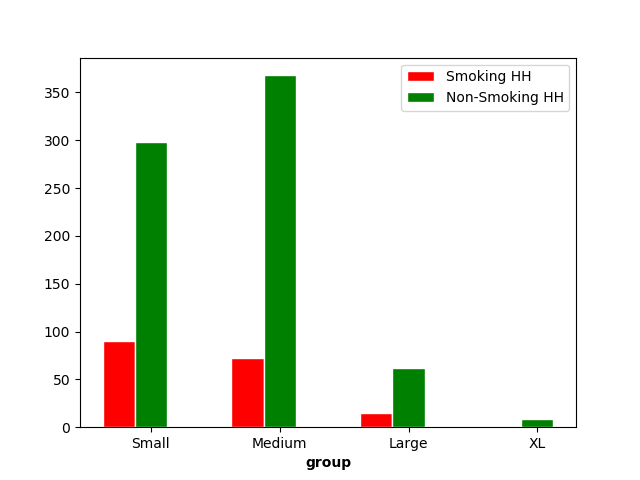

In [232]:
# set width of bar
barWidth = 0.25
 
# set height of bar
smk_asthma_bar = [hh_with_smk_small_asthma, hh_with_smk_medium_asthma, hh_with_smk_large_asthma, hh_with_smk_xl_asthma]
nonsmk_asthma_bar = [hh_without_smk_small_asthma, hh_without_smk_medium_asthma, hh_without_smk_large_asthma, hh_without_smk_xl_asthma]
 
# Set position of bar on X axis
r1 = np.arange(len(smk_asthma_bar))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, smk_asthma_bar, color='Red', width=barWidth, edgecolor='white', label='Smoking HH')
plt.bar(r2, nonsmk_asthma_bar, color='Green', width=barWidth, edgecolor='white', label='Non-Smoking HH')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(smk_asthma_bar))], ['Small', 'Medium', 'Large', 'XL'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
hh_with_smk_small_adhd = hh_with_smk_small.loc[hh_with_smk_small['HH with Asthmatic Child'] == 1]
hh_with_smk_small_asthma  = hh_with_smk_small_asthma['FM_SIZE'].count()
hh_with_smk_small_asthma